In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [272]:
pd.options.display.float_format = '{:.10f}'.format

In [273]:
from pyspark.sql import SparkSession
import databricks.koalas as ks

spark = SparkSession.builder.getOrCreate()

In [274]:
def read_files_spark(local_dir,header):
    df = spark.read.csv(local_dir,encoding='cp949',header=header)
    return df

In [275]:
sales = read_files_spark('./상권-추정매출/서울시우리마을가게상권분석서비스(상권-추정매출)_2020.csv',True).to_koalas()

In [276]:
sales_19 = read_files_spark('./상권-추정매출/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2019.csv',True).to_koalas()

In [277]:
corona = read_files_spark('./코로나-확진자',True).to_koalas()

In [278]:
area = read_files_spark('./상권-영역/서울시 우리마을가게 상권분석서비스(상권영역).csv',True).to_koalas()

In [279]:
area = area[['상권_코드','상권_코드_명','시군구_코드','행정동_코드']]

In [280]:
sales = sales.groupby('상권_코드').agg('sum').dropna(axis=1).reset_index()

In [281]:
sales = sales.merge(area,on='상권_코드')

In [282]:
sales = sales[['상권_코드','분기당_매출_금액','상권_코드_명','시군구_코드','행정동_코드']]

In [283]:
sales

,상권_코드,분기당_매출_금액,상권_코드_명,시군구_코드,행정동_코드
0,1000839,74081354093.0000000000,호암로24길,11620,11620735
1,1000240,3705812805.0000000000,망우로73길,11260,11260655
2,1000280,303503234.0000000000,삼선교로16가길,11290,11290555
3,1000665,11698090341.0000000000,독산로78다길,11545,11545640
4,1000795,17592019681.0000000000,남부순환로142길,11620,11620765
5,1000888,2030366666.0000000000,강남대로140길,11680,11680521
6,1000096,18471108578.0000000000,마조로1길,11200,11200550
7,1000113,154176475800.0000000000,아차산로11길,11200,11200690
8,1000782,9167353049.0000000000,관악로28길,11620,11620575
9,1000828,14506409337.0000000000,장군봉2길,11620,11620595


In [284]:
sales_19 = sales_19.groupby('상권_코드').agg('sum').dropna(axis=1).reset_index()

In [285]:
sales_19 = sales_19.merge(area,on='상권_코드')

In [286]:
sales_19 = sales_19[['상권_코드','분기당_매출_금액','상권_코드_명','시군구_코드','행정동_코드']]

In [287]:
sales_19

,상권_코드,분기당_매출_금액,상권_코드_명,시군구_코드,행정동_코드
0,1000665,10850679215.0000000000,독산로78다길,11545,11545640
1,1000795,17585745482.0000000000,남부순환로142길,11620,11620765
2,1000280,2785857476.0000000000,삼선교로16가길,11290,11290555
3,1000839,76896748782.0000000000,호암로24길,11620,11620735
4,1000888,2585045579.0000000000,강남대로140길,11680,11680521
5,1000240,3629332807.0000000000,망우로73길,11260,11260655
6,1000113,67205488652.0000000000,아차산로11길,11200,11200690
7,1001320,17121767442.0000000000,전농로터리시장,11230,11230560
8,1000782,12798574488.0000000000,관악로28길,11620,11620575
9,1000828,10118213275.0000000000,장군봉2길,11620,11620595


In [288]:
region_code ={'11110':'종로구',
'11140':'중구',
'11170':'용산구',
'11200':'성동구',
'11215':'광진구',
'11230':'동대문구',
'11260':'중랑구',
'11290':'성북구',
'11305':'강북구',
'11320':'도봉구',
'11350':'노원구',
'11380':'은평구',
'11410':'서대문구',
'11440':'마포구',
'11470':'양천구',
'11500':'강서구',
'11530':'구로구',
'11545':'금천구',
'11560':'영등포구',
'11590':'동작구',
'11620':'관악구',
'11650':'서초구',
'11680':'강남구',
'11710':'송파구',
'11740':'강동구'
}

In [289]:
sales=sales.to_pandas()

In [290]:
sales['시군구_명'] = sales['시군구_코드'].apply(lambda x: region_code[x])

In [291]:
sales

,상권_코드,분기당_매출_금액,상권_코드_명,시군구_코드,행정동_코드,시군구_명
0,1000839,74081354093.0000000000,호암로24길,11620,11620735,관악구
1,1000240,3705812805.0000000000,망우로73길,11260,11260655,중랑구
2,1000280,303503234.0000000000,삼선교로16가길,11290,11290555,성북구
3,1000665,11698090341.0000000000,독산로78다길,11545,11545640,금천구
4,1000795,17592019681.0000000000,남부순환로142길,11620,11620765,관악구
...,...,...,...,...,...,...
1481,1001053,68956577121.0000000000,서울 강남구 대치역_1,11680,11680600,강남구
1482,1001068,50950254334.0000000000,은마아파트입구사거리_2,11680,11680610,강남구
1483,1001375,9534915453.0000000000,증산종합시장,11380,11380640,은평구
1484,1001388,1733849148.0000000000,영진시장,11440,11440660,마포구


In [292]:
sales_19=sales_19.to_pandas()

In [293]:
sales_19['시군구_명'] = sales_19['시군구_코드'].apply(lambda x: region_code[x])

In [294]:
sales_19

,상권_코드,분기당_매출_금액,상권_코드_명,시군구_코드,행정동_코드,시군구_명
0,1000665,10850679215.0000000000,독산로78다길,11545,11545640,금천구
1,1000795,17585745482.0000000000,남부순환로142길,11620,11620765,관악구
2,1000280,2785857476.0000000000,삼선교로16가길,11290,11290555,성북구
3,1000839,76896748782.0000000000,호암로24길,11620,11620735,관악구
4,1000888,2585045579.0000000000,강남대로140길,11680,11680521,강남구
...,...,...,...,...,...,...
1483,1000800,22371290512.0000000000,남부순환로248길,11620,11620625,관악구
1484,1001053,70653501243.0000000000,서울 강남구 대치역_1,11680,11680600,강남구
1485,1001474,35064240513.0000000000,도곡시장,11680,11680650,강남구
1486,1001388,1885618289.0000000000,영진시장,11440,11440660,마포구


In [295]:
sales = sales.merge(sales_19,on='상권_코드')

In [296]:
sales = sales.groupby(['시군구_명_x']).agg("sum")

In [297]:
sales['매출_증감률'] = ((sales['분기당_매출_금액_x']-sales['분기당_매출_금액_y'])/sales['분기당_매출_금액_y'])*100

In [298]:
sales.sort_values('매출_증감률',ascending=False).reset_index()

,시군구_명_x,분기당_매출_금액_x,분기당_매출_금액_y,매출_증감률
0,금천구,2948442727744.0000000000,2169606579505.0000000000,35.8975749611
1,용산구,6957311925581.0000000000,5227183496158.0000000000,33.0986740889
2,동대문구,2870584181737.0000000000,2216938011368.0000000000,29.4841879663
3,성동구,1614078842489.0000000000,1373641727471.0000000000,17.5036263248
4,송파구,4518845834550.0000000000,3885635767545.0000000000,16.2961766075
5,동작구,2896181453576.0000000000,2539601806836.0000000000,14.0407699262
6,강동구,2286700033947.0000000000,2049011143932.0000000000,11.6001755637
7,영등포구,3303938737442.0000000000,2975547935114.0000000000,11.0363136299
8,도봉구,803519680110.0000000000,744961014985.0000000000,7.8606348449
9,은평구,1180724468919.0000000000,1110721641393.0000000000,6.3024636342


In [299]:
corona = corona[corona['자치구 기준일'] < '2021.01.01.00']

In [300]:
corona = corona.drop(columns=['자치구 기준일','수집일'])

In [301]:
corona = corona.astype('int64').dropna()

In [302]:
column_list = corona.columns
for i in range(0,len(column_list),2):
    cur = column_list[i].split()[0]
    corona[cur] = corona[column_list[i]] + corona[column_list[i+1]]

In [303]:
corona = corona.iloc[:,52:]

In [304]:
corona

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,노원구,은평구,서대문구,마포구,양천구,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,기타
327,406,284,417,450,473,636,802,819,438,565,820,785,516,698,738,1346,633,331,689,807,1039,830,938,1121,583,2224
328,384,284,424,444,452,626,790,812,437,559,807,784,501,681,708,1338,616,323,678,795,1010,829,935,1107,575,2159
329,386,277,408,430,430,608,770,784,421,550,788,760,492,680,686,1317,599,299,667,771,986,808,915,1084,566,2323
330,373,273,410,439,430,605,723,766,411,543,775,757,486,672,675,1303,589,301,658,757,941,793,915,1067,574,1824
331,371,268,403,422,419,599,689,758,397,541,749,732,480,667,659,1309,593,291,653,743,949,782,891,1056,551,1829
332,354,257,401,408,414,591,679,745,393,539,749,745,482,648,656,1299,593,283,662,743,921,771,869,1035,554,1754
333,349,256,399,403,417,567,643,737,384,500,725,701,477,647,605,1251,517,263,631,738,905,756,858,999,536,1989
334,340,250,380,403,404,563,641,719,379,501,720,679,472,629,587,1245,525,261,630,714,890,749,847,997,525,1415
335,336,247,368,400,396,549,627,714,369,482,716,675,463,610,586,1199,499,258,622,697,874,743,846,967,522,1380
336,323,248,365,388,369,539,618,701,360,487,712,636,458,565,549,1173,504,246,599,683,853,737,832,930,512,1337


In [305]:
corona_sum = corona.to_pandas().sum()

In [308]:
corona_sum = corona_sum.drop('기타')

In [309]:
corona_sum

종로구     19930
중구      14356
용산구     29923
성동구     29502
광진구     25640
동대문구    37884
중랑구     40500
성북구     59689
강북구     27138
도봉구     40049
노원구     57141
은평구     50485
서대문구    30772
마포구     38409
양천구     41513
강서구     71373
구로구     41976
금천구     19393
영등포구    41989
동작구     50933
관악구     77510
서초구     50748
강남구     65041
송파구     73097
강동구     37904
dtype: int64

In [313]:
sales

,분기당_매출_금액_x,분기당_매출_금액_y,매출_증감률
시군구_명_x,,,
강남구,11519222906102.0000000000,11459158403943.0000000000,0.5241615487
강동구,2286700033947.0000000000,2049011143932.0000000000,11.6001755637
강북구,1285989558051.0000000000,1282321655296.0000000000,0.2860360924
강서구,1642371973387.0000000000,1687416362001.0000000000,-2.6694294087
관악구,2240454729965.0000000000,2222198634420.0000000000,0.8215330197
광진구,1975230863647.0000000000,2057981876781.0000000000,-4.0209787106
구로구,1832534143829.0000000000,1934781560592.0000000000,-5.2847008079
금천구,2948442727744.0000000000,2169606579505.0000000000,35.8975749611
노원구,781984796349.0000000000,815243888123.0000000000,-4.0796493244


In [314]:
sales['매출_증감률'].corr(corona_sum)

-0.25421214590264607

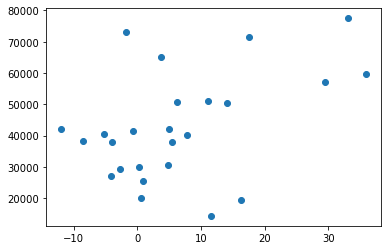

In [315]:
plt.scatter(sales['매출_증감률'],corona_sum)